In [67]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 


In [68]:
data=pd.read_csv('PVsolar6kw.csv')
data.head()


,Time,Energy
0,2021-01-01,1857.6667
1,2021-01-02,2297.0001
2,2021-01-03,7480.0001
3,2021-01-04,3504.3333
4,2021-01-05,1808.3332


In [69]:
data.index=pd.to_datetime(data['Time'])
data.drop(columns='Time', inplace=True)
data.head()

,Energy
Time,
2021-01-01,1857.6667
2021-01-02,2297.0001
2021-01-03,7480.0001
2021-01-04,3504.3333
2021-01-05,1808.3332


In [70]:
data.describe()

,Energy
count,365.000000
mean,55165.995537
std,44164.358795
min,0.000000
25%,12079.999800
50%,50393.333400
75%,92078.666500
max,152648.333000


<AxesSubplot:xlabel='Time'>

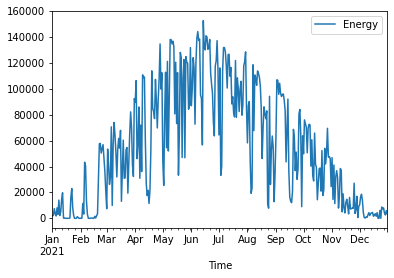

In [71]:
data.plot()

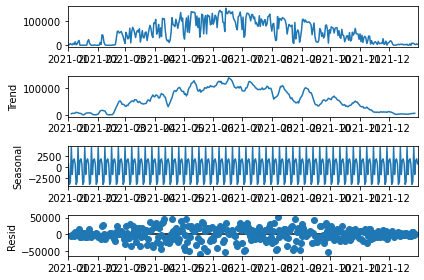

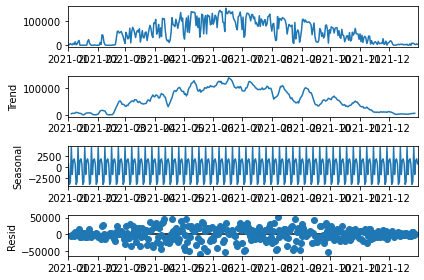

In [72]:
#decomposing data to check the seasonality 
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_data = seasonal_decompose(data, model="additive")
decompose_data.plot()

<AxesSubplot:xlabel='Time'>

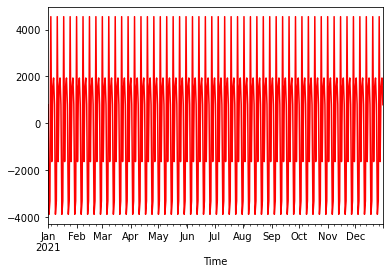

In [73]:
seasonality=decompose_data.seasonal
seasonality.plot(color='red')
#this plot shows how the seasonality variation looks like 
# and hence we can conclude that our data is seasonal

In [74]:
#performing addfuller test to know the value of P and hence concluding that 
#our data is stationary or not 
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(data.Energy, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -1.0454339642243309
2. P-Value :  0.7363349159643041
3. Num Of Lags :  16
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 348
5. Critical Values :
	 1% :  -3.4492815848836296
	 5% :  -2.8698813715275406
	 10% :  -2.5712138845950587


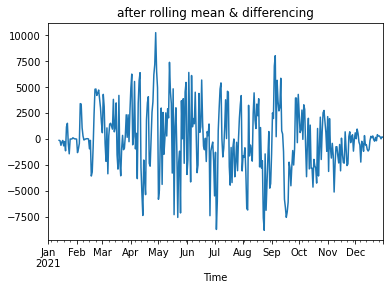

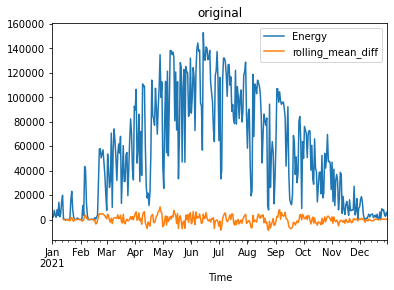

In [75]:
# as the p value is >0.05 hence our time series is not stationary
rolling_mean = data.rolling(window = 12).mean()
data['rolling_mean_diff'] = rolling_mean - rolling_mean.shift()
ax1 = plt.subplot()
data['rolling_mean_diff'].plot(title='after rolling mean & differencing');
ax2 = plt.subplot()
data.plot(title='original');

In [76]:
dftest = adfuller(data['rolling_mean_diff'].dropna(), autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
  print("\t",key, ": ", val)

1. ADF :  -5.72317562005628
2. P-Value :  6.866204072473624e-07
3. Num Of Lags :  13
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 339
5. Critical Values :
	 1% :  -3.4497880749874628
	 5% :  -2.870103829170425
	 10% :  -2.571332495975496


In [77]:
# using ARIMA
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(data['Energy'],order=(1,1,2))
history=model.fit()

C:\Users\msi1\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\msi1\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will 

In [78]:
history.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.Energy   No. Observations:                  364
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -4181.037
Method:                       css-mle   S.D. of innovations          23532.305
Date:                Fri, 01 Apr 2022   AIC                           8372.075
Time:                        00:17:23   BIC                           8391.560
Sample:                    01-02-2021   HQIC                          8379.819
                         - 12-31-2021                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.3634    207.978      0.021      0.983    -403.266     411.993
ar.L1.D.Energy     0.4603      0.155      2.976      0.003       0.157       0.764
ma.L1.D.Energy    -1.0057      0.170     -5.928      0.000      -1.338      -0.673
ma.L2.D.Energy     0.0945      0.144      0.658      0.510      -0.187       0.376
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.1724           +0.0000j            2.1724            0.0000
MA.1            1.1103           +0.0000j            1.1103            0.0000
MA.2            9.5266           +0.0000j            9.5266            0.0000
-----------------------------------------------------------------------------
"""

C:\Users\msi1\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<AxesSubplot:xlabel='Time'>

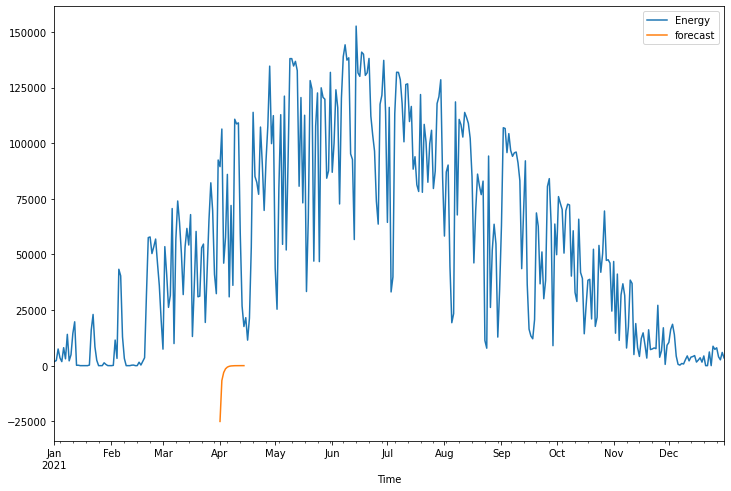

In [79]:
model_fit=model.fit()
data['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
data[['Energy','forecast']].plot(figsize=(12,8))

In [93]:
# As we have seeen that ARIMA model is not that capable of predicting the data so we have to find the rolling mean difference 
# and fit the model again
model=ARIMA(data['rolling_mean_diff'].dropna(),order=(2,0,2))
model_fit=model.fit()

C:\Users\msi1\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\msi1\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will 

<AxesSubplot:>

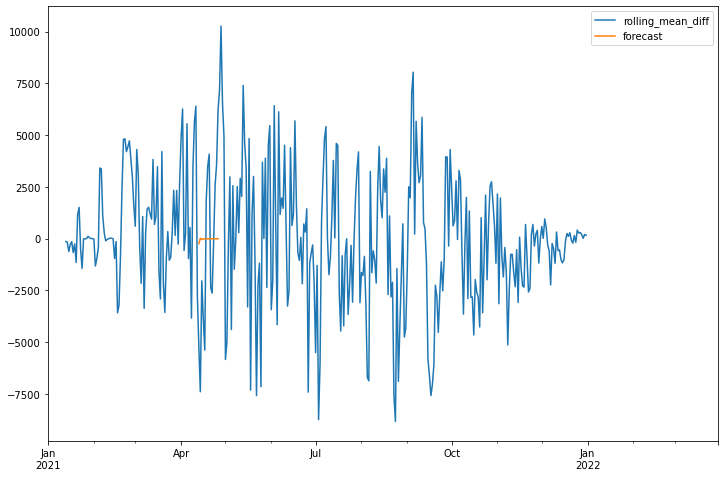

In [94]:
data['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
data[['rolling_mean_diff','forecast']].plot(figsize=(12,8))

In [95]:
#Now using SARIMAX we can predit the model as of greater efficiency than the ARIMA model 
import statsmodels.api as sm

In [96]:
model=sm.tsa.statespace.SARIMAX(data['Energy'],order=(1, 1, 2),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\msi1\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\msi1\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\msi1\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<AxesSubplot:>

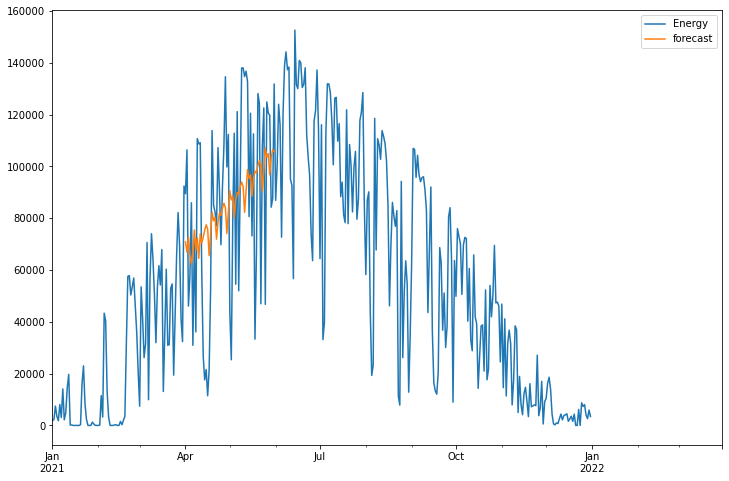

In [97]:
data['forecast']=results.predict(start=90,end=150,dynamic=True)
data[['Energy','forecast']].plot(figsize=(12,8))

<AxesSubplot:>

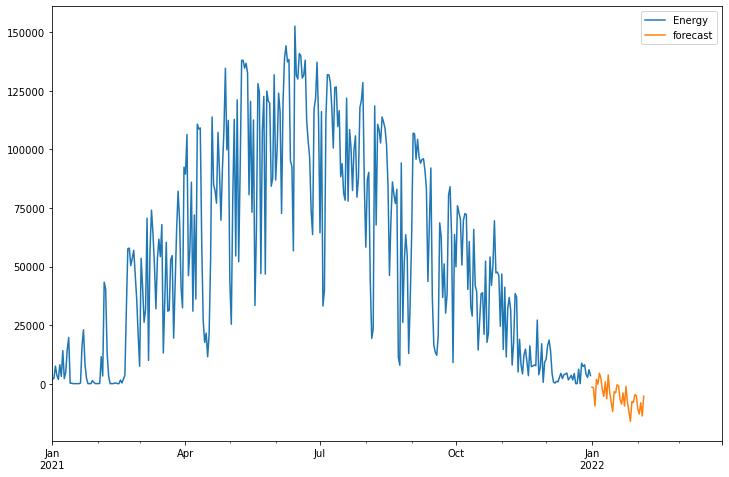

In [98]:
data['forecast'] = results.predict(start =365 , end = 400, dynamic= True)  
data[['Energy', 'forecast']].plot(figsize=(12, 8))

In [99]:
from pandas.tseries.offsets import DateOffset
pred_date=[data.index[-1]+ DateOffset(days=x)for x in range(0,90)]

In [100]:
pred_date=pd.DataFrame(index=pred_date[1:],columns=data.columns)
pred_date

,Energy,rolling_mean_diff,forecast
2022-03-31,NaN,NaN,NaN
2022-04-01,NaN,NaN,NaN
2022-04-02,NaN,NaN,NaN
2022-04-03,NaN,NaN,NaN
2022-04-04,NaN,NaN,NaN
...,...,...,...
2022-06-23,NaN,NaN,NaN
2022-06-24,NaN,NaN,NaN
2022-06-25,NaN,NaN,NaN
2022-06-26,NaN,NaN,NaN


In [101]:
data=pd.concat([data,pred_date])

<AxesSubplot:>

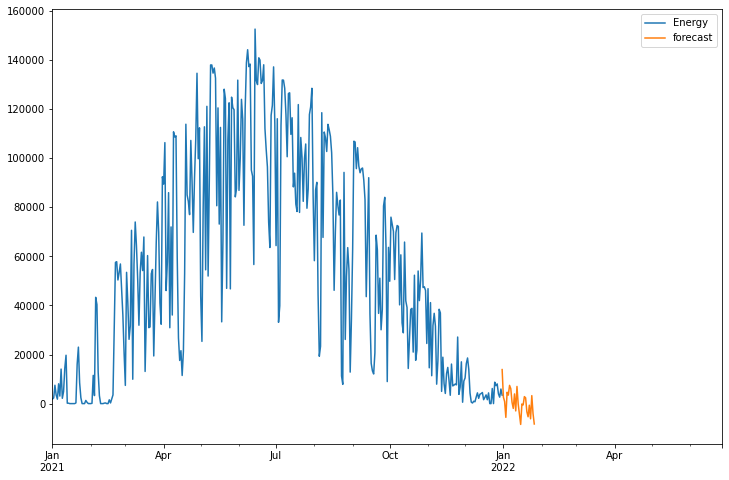

In [102]:
data['forecast'] = results.predict(start = 364, end = 390, dynamic= True)  
data[['Energy', 'forecast']].plot(figsize=(12, 8))